#### Abstract

* Generative models via an **adversarial process**
* 2개의 모델을 훈련
  1. G : 데이터의 분포를 학습, D가 오판을 할 확률을 최대화 하도록 훈련(생성자가 만든 가짜를 진짜로 착각하도록)
  2. D : 입력으로 주어진 샘플이 생성자가 아닌 실제 훈련 데이터셋에서 주어졌을 확률을 추청 (진짜인지 가짜인지 판별) 
  
  **Minimax two player game**
  임의의 함수 G, D의 공간에서 G가 훈련 데이터의 분포를 모사하게 되면서, D가 입력을 실제 훈련 데이터인지, G가 생성한 가짜 데이터인지 판별   하는 확률은 1/2가 됨 (실제 데이터와 G가 생성한 진짜 같은 가짜 데이터의 판별이 어려워짐) 
  
  
* **경쟁**하는 과정을 통해 generative model을 추정하는 새로운 프레임워크 제안 

**생성 모델과 판별 모델을 각각 학습하여 G는 실제 훈련 데이터의 확률 분포를 학습하여 이와 유사한 데이터를 생성하고, D는 실제 데이터와 G가 생성한 데이터를 구별하려는 경쟁적인 과정**

#### 1. Introduction

1. 딥러닝의 성과
   * AI 영역에서 마주하는 다양한 유형의 데이터들에 대해 모집단에 근사하는 확률 분포를 표현하는 계층적 모델을 발견, 고차원의 데이터를 클래스 레이블에 mapping하여 분류하는 모델
   
   
2. 한계
   * Deep Generative model들은 MLE와 관련된 방식들에서 발생하는 어려움들이 있음 (많은 확률 연산들을 근사하기 어려움)
   * 생성 과정에서 딥러닝의 성과를 이끌었던 선형 활성화 함수들의 이점을 활용하기 어려움

3. 개요

   * **경쟁** : D는 입력 데이터가 G의 생성 데이터인지 실제 훈련 데이터인지 판별하는 것을 학습
   * 경찰과 위조지폐범 => 경쟁하는 과정의 반복을 통해 어느 순간 부터 위조지폐범이 진짜와 다를 바 없는 위조지폐를 생성, 경찰이 위조 지폐                           를 구별하는 확률도 50%로 수렴
   
**해당 프레임워크는 MLP를 사용함으로써 순전파, 역전파, 드롭아웃으로 충분히 학습이 가능**

#### 2. Adversarial nets

* G의 분포 P_g를 x에 대해 학습시키기 위해 input noise 변수에 대한 사전분포 P(z)를 정의, 데이터 공간에서의 noise변수의 mapping을 G(Z;theta_g)로 표현
   * G는 파라미터 theta에 대해 미분가능한 MLP
   
   
* D(x;theta_d)는 scalar값(확률)을 출력
   * D(x)는 입력된 샘플이 실제 데이터 분포로부터 얻어졌을 확률을 계산
   * D가 실제 데이터와 생성 데이터를 적절히 분류할 수 있도록 하는 확률을 최대화하도록 학습
   * 이와 동시에 G가 log(1-D(G(Z)))를 최소화 하도록 훈련

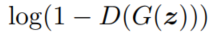

* D(G(Z))=0.99 : 생성자가 input noise Z를 입력으로 받아 생성한 이미지가 실제 데이터와 분간하기 힘듬 (잘 만든 위조 지폐)
* D(G(Z))=0.01 : 못만든 위조 지폐

log(1-0.99)=-2  < log(1-0.01)=-0.0043...

**2-player minimax game with value function V(G, D)**

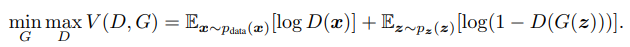

1. D(x)값이 클 수록 실제 데이터에 대한 라벨링을 잘한다는 의미 (log0.9=-0.04 > log0.5=-0.3)
2. G는 log(1-D(G(Z)))를 최소화 하도록 훈련

* G가 학습을 위해 충분한 gradient를 전달받지 못하는 경우 O => 학습 초기 단계에서 G가 생성한 낮은 퀄리티의 생성 데이터를 D가 매우 높은 수준의 confidence로 기각하기 때문(강한 '믿음'으로 생성 데이터가 실제 데이터가 아니라고 판단함)


* sigmoid함수의 경우 너무 실제 같거나 너무 퀄리티가 낮은 데이터의 경우 그 gradient값이 0에 가깝게 출력되는 문제 O(saturated)


**log(D(G(Z)))를 최대화 하도록 목적 함수를 재설정하면 초기 단계에 보다 풍부한 gradient정보를 제공받을 수 있음**

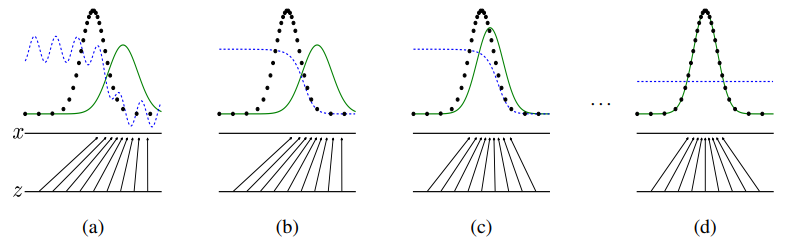

* 파란색 : D가 모델링하는 조건부 확률
* 녹색 : G가 모델링하는 P_g
* 검은색 : 실제 데이터 생성 분포
* 상단 수평선 : x 도메인 / 하단 수평선 : z가 균일하게 샘플링되는 도메인
* 위로 향하는 화살표 : x=G(z) mapping을 통과한 샘플들이 어떤 식으로 non-uniform한 P_g를 표현하는지 나타냄

**G는 G(z)가 밀집된 부분에 높은 확률 밀도를 줌, 학습이 진행됨에 따라 G가 모델링하는 P_g확률 분포는 P_x에 근사하고, D가 모델링하는 시그모이드 curve는 1/2로 수렴(평탄화)**

#### 4.Theoretical Results

* G(z)는 P_g를 정의, z~p(z)일때 얻어지는 샘플들의 확률 분포

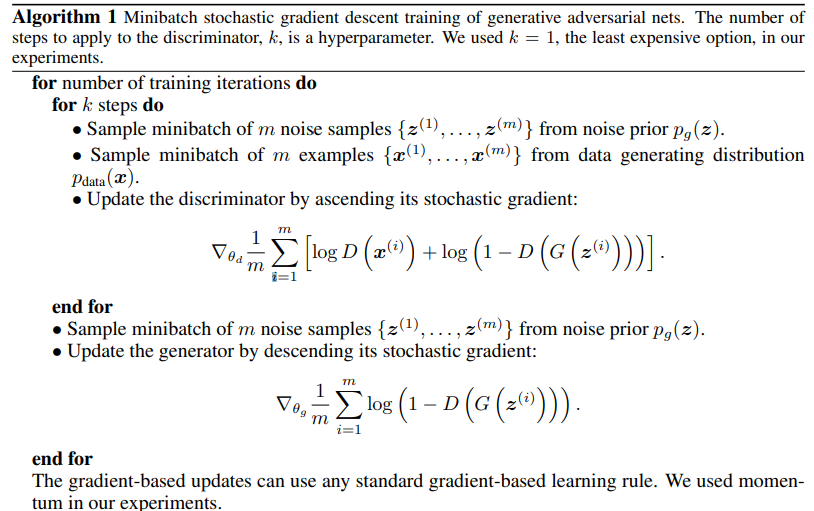

* epoch마다 해당 알고리즘의 과정을 k번 반복 (해당 논문에서는 K=1)

1. P_g(z)로부터 m개의 noise sample을 샘플링
2. m개의 실제 데이터 샘플을 p(x)로부터 샘플링
3. 경사 상승법을 사용해 D의 파라미터를 업데이트 (V식 전체를 최대화 하도록) \
이후 
4. m개의 noise sample을 P_g(z)로부터 샘플링
5. V에서 log(1-D(G(Z)))를 최소화 하도록 g 파라미터 업데이트

#### 4.1 Global Optimaility of P_g = P_data

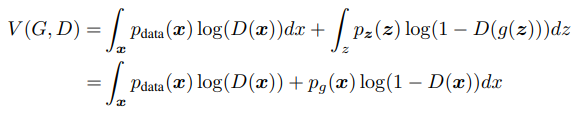

* 위 식을 D에 대해 편미분하고, 그 결과값을 0이라고 세팅하면 Optimal D는 아래와 같이 얻어짐

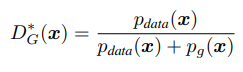
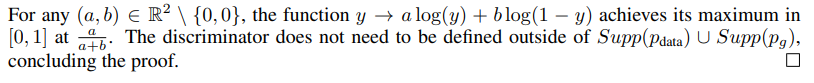

* D의 목적은 조건부 확률 P(Y=y|x) (y=1 if x comes from real data)에 대한 추정의 로그 가능도를 최대화 하는 것
* 위에서 얻은 optimal D를 원래 목적함수식 V에 대입

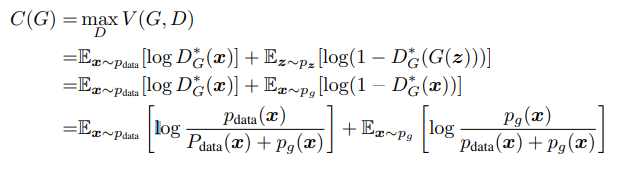

* C(G)는 G가 최소화하고자 하는 기준, p_g=p_data일때가 유일한 global minimum 

#### 4.2 Convergence of Algorithm1

* G와 D가 충분한 capacity를 가지고, 알고리즘의 각 단계에서 D가 주어진 G에 대해 최적점에 도달하는 것이 가능하며, P_g가 위에서 제시한 C를 최소화 하도록 갱신되는 한 P_g는 P_data에 수렴 

### GANs in Action 1

**생성적** : 모델의 목적, 훈련 세트에 따라 새로운 데이터를 생성

**적대적** : 생성자와 판별자 사이의 게임같은 경쟁 구도, 생성자와 판별자는 서로를 이기려는 경쟁을 지속하며 생성자가 더 그럴듯한 데이터를 생성할 수록 판별자 역시 가짜와 진짜를 구별하는 일에 탁월해져야 함

**생성자, 판별자 두 네트워크 모두 동시에 지속해서 성능이 향상됨**

#### 생성자

* 패턴을 인식하는 대신 랜덤한 숫자로 구성된 노이즈 벡터를 입력으로 받아 이미지를 직접 생성
* 판별자의 분류 결과로부터 피드백을(gradient) 받아 학습, 생성자가 만든 이미지를 판별자가 가짜라는 것을 정확히 포착할 때마다 생성자는 **더 그럴듯한** 결과물을 생성하도록 업데이트
* 최대한 진짜 같아 보이는 가짜 샘플 출력

**판별자**

* 일반적인 분류 모델처럼 지속해서 학습, 성능 향상
* 입력 샘플이 진짜일 예측 확률 출력

#### 훈련

1. 판별자 훈련
   a. 훈련 데이터셋에서 랜덤하게 진짜 샘플 x를 선택 \
   b. 새로운 랜덤함 잡음 벡터 z로부터 가짜 샘플 x'를 합성(G(z)) \
   c. 판별자를 통해 x와 x'를 분류 \
   d. 분류 오차를 계산하고 역전파를 통해 판별자의 파라미터를 업데이트, **분류 오차를 최소화**
   
   
2. 생성자 훈련 \
   a. 생성자 네트워크를 사용해 z로부터 x'합성 \
   b. 판별자를 통해 분류 \
   c. 분류 오차를 계산, 역전파를 통해 파라미터를 업데이트, **판별자의 오차를 최대화**

**GAN은 내시 균형에 도달 하도록 훈련됨** 

* 생성자가 훈련 데이터셋의 실제 데이터와 구별이 안되는 데이터를 생성하고, 판별자가 할 수 있는 최선이 특정 샘플이 진짜인지 가짜인지 **랜덤하게** 추측하는 것 뿐(1/2)

한 도메인의 이미지를 다른 이미지로 변환하는 것이 가능 ex) cycle gan

### GANs In Action 3

#### 적대적 훈련

* 생성자, 판별자 모두 **미분가능한 함수**로 표현


* 생성자와 판별자는 각각 자신만의 비용함수를 가짐
     * 판별자의 손실을 활용하여(역전파) 두 네트워크를 훈련
     * 판별자는 fake, real의 판별에 대한 손실을 최소화하고자
     * 생성자는 자신이 생성한 fake에 대해 판별자의 손실을 최대화하고자

* 이미지는 값을 담은 3차원(RGB)행렬, 픽셀값이 이미지의 시각적 요소들을 표현
    * 선, 모서리, 곡선 등 이미지의 시각적 요소들의 값이 이미지에 복잡하게 걸쳐있는 분포를 표현
    
    
* 생성자는 훈련 데이터셋의 데이터 분포를 흉내내는 샘플을 생성하고자 함 (패턴을 합성하는 것을 학습)

#### 비용함수

* GAN의 두 네트워크의 비용함수 J_G, J_D는 두 네트워크의 파라미터에 모두 의존
  - 생성자의 비용함수 : J_G(theta_G, theta_D) / 판별자의 비용함수 : J_D(theta_G, theta_D)
  
  
* 훈련하는 동안 생성자는 theta_G만, 판별자는 theta_D만 튜닝할 수 있음 (손실을 정의하는 것 중 일부분만 제어)
  - 비용함수는 상호작용 인자에 영향을 받음, 어떤 것은 제어(튜닝)할 수 있으나 어떤 것은 그렇지 않음
  - 내 결정 뿐 아니라 타인의 행동에도 영향을 받음 
  
**생성자와 판별자는 자신의 파라미터만 튜닝, 상대의 파라미터는 튜닝 불가**


* 내시 균형에 도달할때 GAN 훈련 완료 (게임에서 어느 선수도 전략을 바꾸어 현재 상황을 개선할 수 없음)
  - 생성자의 파라미터 theta_G에 대한 생성자의 비용함수 J_G(theta_G, theta_D)가 최소화
  - 판별자의 파라미터 theta_D에 대한 판별자의 비용함수 J_D(theta_G, theta_D)가 최소화

#### 생성자, 판별자

* 상충되는 목적
    - G(Z)=x', 판별자는 진짜 샘플 x에 대해서는 가능한 1에 가까운 값을 출력하기 위해 노력함, 생성자는 D(x')가 가능한 1에 가깝게 되기를 원함
    - 생성자는 판별자의 오분류를 원함 (D(x')가 1이 되도록 x'를 생성)
    - 판별자는 D(x')를 0에 가깝게 출력하고자 함
  

* 오차행렬
    - 판별자는 진짜 양성과 진짜 음성 분류를 최대화하고자 노력 (거짓 양성, 거짓 음성 분류를 최소화)
    - 생성자는 판별자의 거짓 양성 분류를 최대화
    - **생성자는 가짜 샘플에 대한 판별자의 분류만 고려** (진짜 샘플에 대한 판별자의 분류 능력에 관심 x)
   
   
**생성자와 판별자는 자신에게 관련된 신호만 업데이트에 적용**
 